In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [75]:
# import data
bikesharing = pd.read_csv('hour.csv') # hourly count of rented bikes
bikesharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [76]:
# 1. Data Engineering 
# source: https://ml-ops.org/content/end-to-end-ml-workflow

# 1.1 Data Ingestion -> colleting data
# 1.2 Exploration and Validation -> information about the content and structure of the data -> set of metadata (e.g max, min, avg) +
#                                   spot data errors
# 1.3 Data Wrangling (Cleaning)
# 1.4 Data Labeling
# 1.5 Data Splitting



# 1.2 Exploration and Validation
print(bikesharing.head())
print(bikesharing.info())

# overview + check if any missing values

# note: 50th percentile = median
bikesharing.loc[:, bikesharing.columns!='instant'].describe(include='all').T

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0     1   0        0        6           0           1  0.24  0.2879  0.81        0.0       3          13   16
1        2  2011-01-01       1   0     1   1        0        6           0           1  0.22  0.2727  0.80        0.0       8          32   40
2        3  2011-01-01       1   0     1   2        0        6           0           1  0.22  0.2727  0.80        0.0       5          27   32
3        4  2011-01-01       1   0     1   3        0        6           0           1  0.24  0.2879  0.75        0.0       3          10   13
4        5  2011-01-01       1   0     1   4        0        6           0           1  0.24  0.2879  0.75        0.0       0           1    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0
temp,17379.0,NaN,NaN,NaN,0.496987,0.192556,0.02,0.34,0.5,0.66,1.0


Number of attributes of type "Nominal": 3 (weathersit, working day, holiday)
<br>Number of attributes of type "Interval": 5 (month, season, dteday, year, weekday)
<br>Number of attributes of type "Ratio": 8 (cnt, registered, casual, windspeed, hum, hr, atemp, temp)

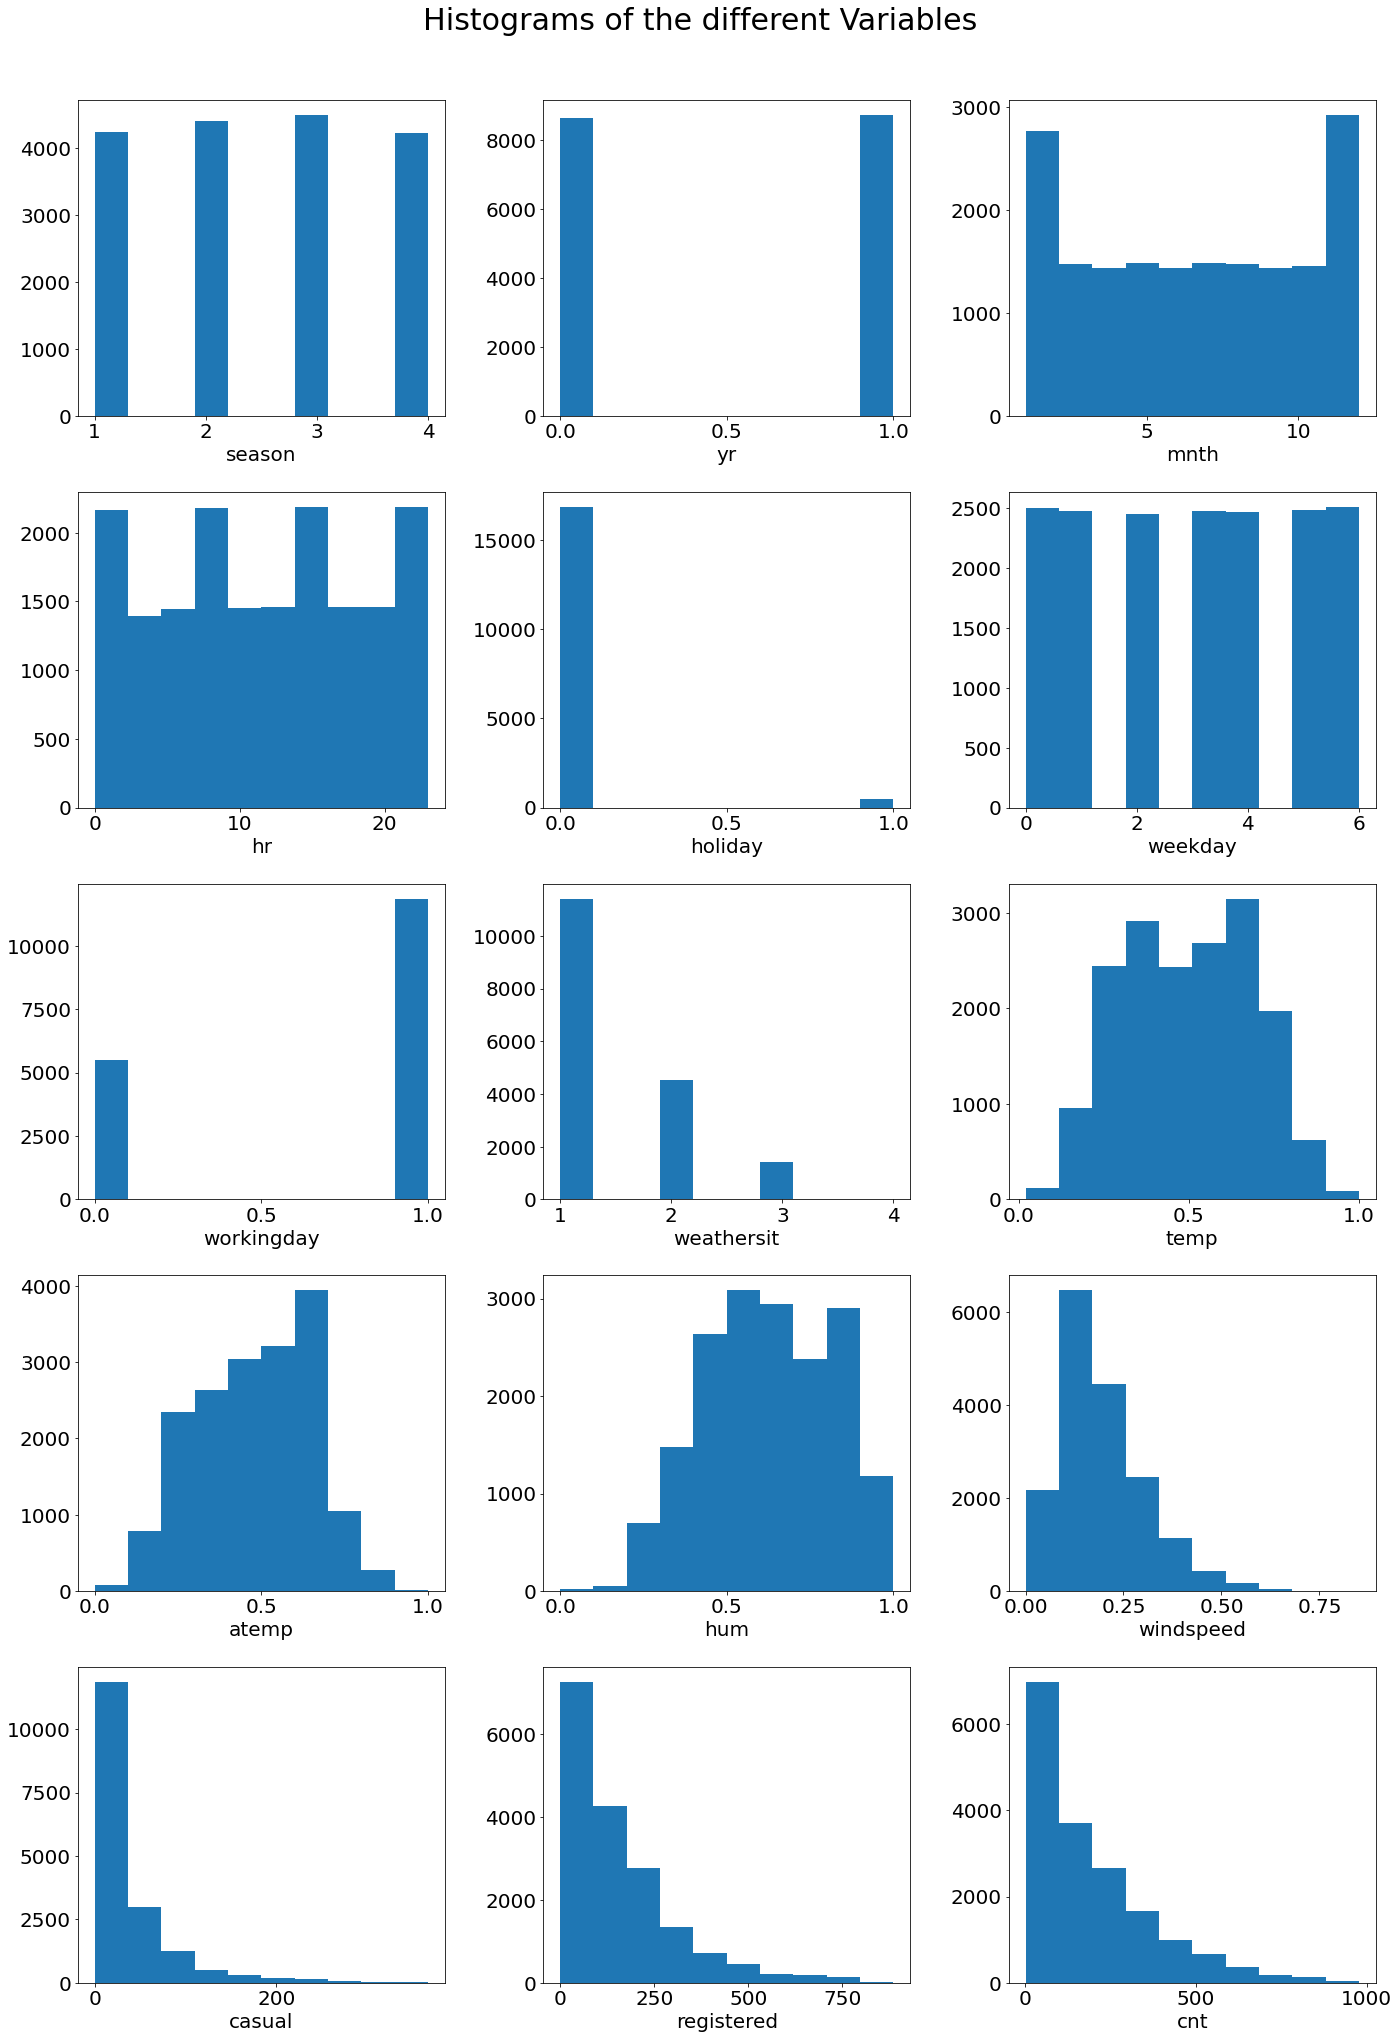

In [80]:
# 1.2 Exploration and Validation

# Visualize data 
# categorical variables -> histogram (bin size rule?) -> season, yr, 

fig = plt.figure(figsize=(20, 30))

for counter, column in enumerate(bikesharing.loc[:, ~bikesharing.columns.isin(['instant', 'dteday'])].columns):

    ax = fig.add_subplot(5, 3,counter+1)
    ax.hist(bikesharing[column])
    ax.set_xlabel(column)

plt.rcParams.update({'font.size': 25})
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Histograms of the different Variables')
plt.show()

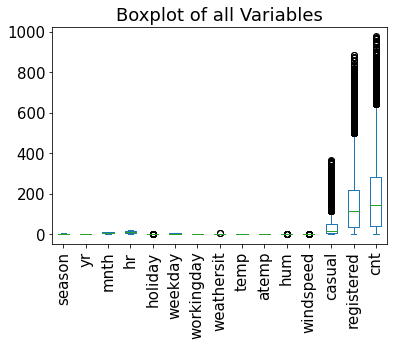

In [84]:
# Outliers

bikesharing.loc[:, ~bikesharing.columns.isin(['instant', 'dteday'])].plot.box()
plt.xticks(rotation=90)
plt.title('Boxplot of all Variables')
plt.rcParams.update({'font.size': 10})
plt.show()

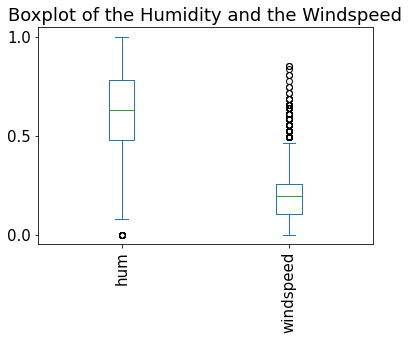

In [88]:
bikesharing.loc[:, bikesharing.columns.isin(['hum', 'windspeed'])].plot.box()
plt.xticks(rotation=90)
plt.title('Boxplot of the Humidity and the Windspeed')
plt.rcParams.update({'font.size': 25})
plt.show()

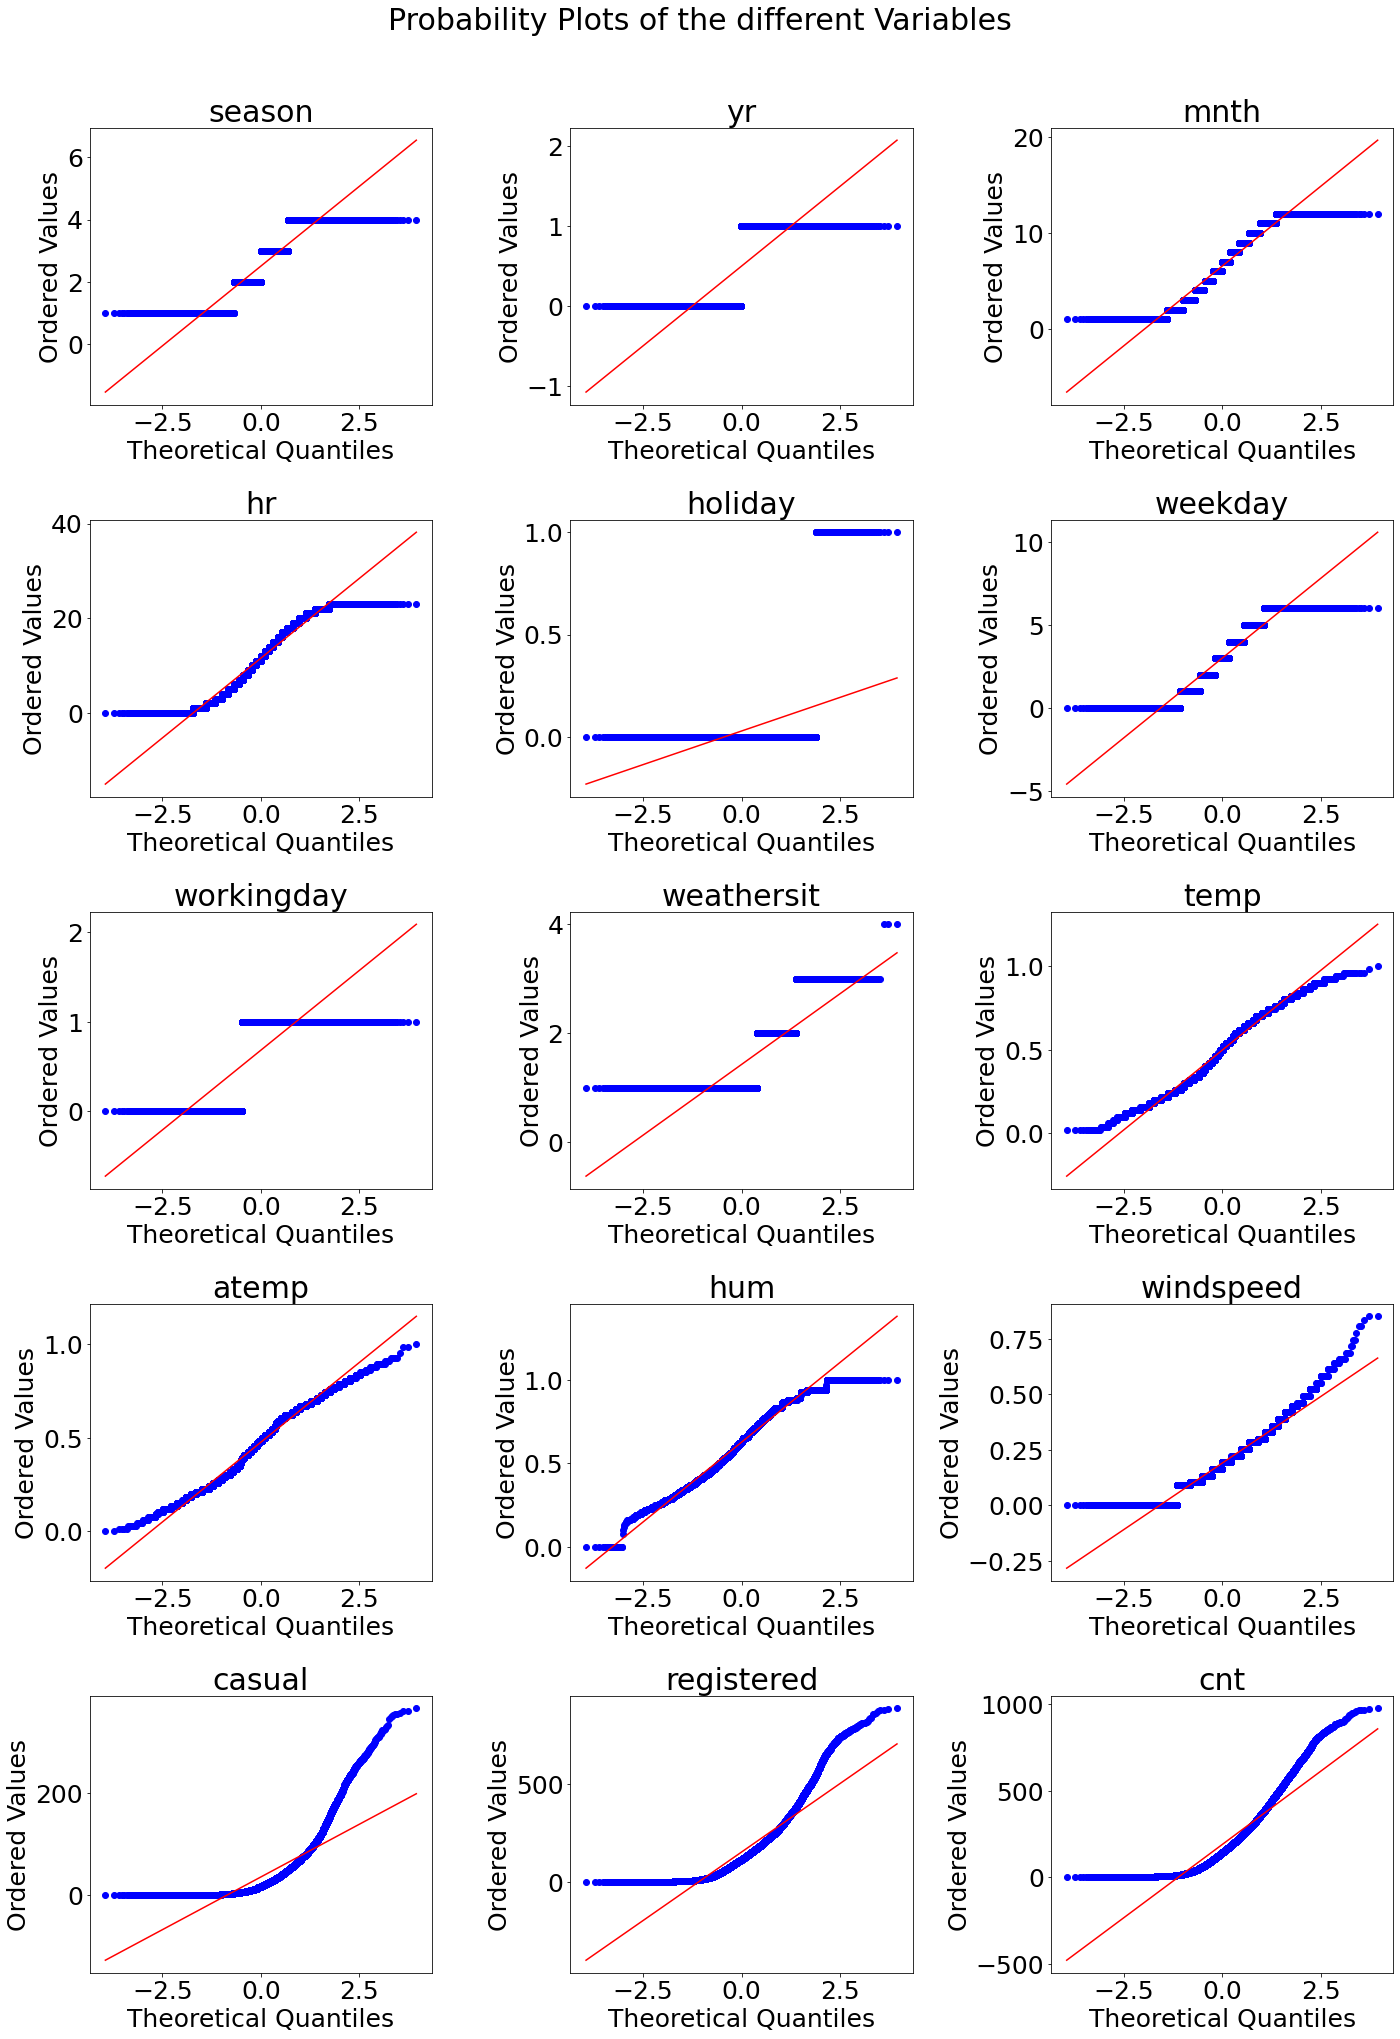

In [90]:
fig = plt.figure(figsize=(20, 30))

for counter, column in enumerate(bikesharing.loc[:, ~bikesharing.columns.isin(['instant', 'dteday'])].columns):

    ax = fig.add_subplot(5, 3,counter+1)
    probplot(x=bikesharing[column],dist='norm',plot=ax)
    ax.set_title(column)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Ordered Values')
    
plt.rcParams.update({'font.size': 25})
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Probability Plots of the different Variables')
plt.show()

In [93]:
# 2. Model Engineering

# Feature Engineering -> one hot encoding

# weathersit
bikesharing = pd.get_dummies(bikesharing, columns = ['weathersit'])
bikesharing_one_hot = bikesharing
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

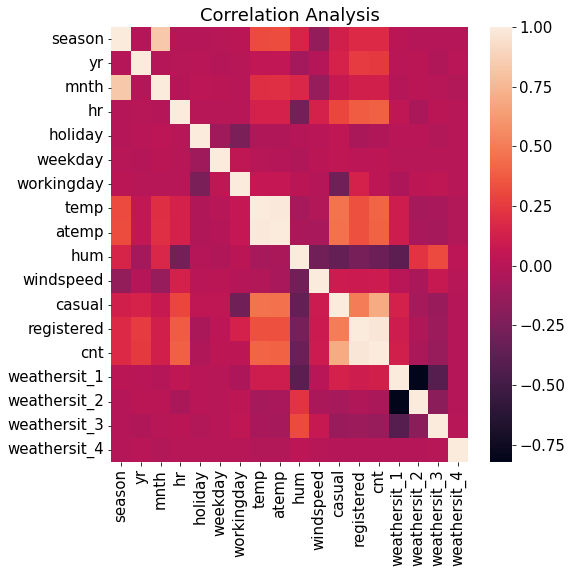

In [98]:
# Correlation
plt.figure(figsize=(8,8))
corr_bikesharing_one_hot = bikesharing_one_hot.loc[:, ~bikesharing.columns.isin(['instant', 'dteday'])].corr()
sn.heatmap(corr_bikesharing_one_hot)
plt.title('Correlation Analysis')
plt.rcParams.update({'font.size': 25})
plt.show()

# correlation between:
# season and month
# temp and atemp
# registered and cnt
# neg. correlation between weathersit_1 and weathersit_2

In [100]:
# Feature Engineering -> cyclical features encoding
# hr
bikesharing['hr_sin'] = np.sin(bikesharing['hr']*(2.*np.pi/24))
bikesharing['hr_cos'] = np.cos(bikesharing['hr']*(2.*np.pi/24))
# weekday 
bikesharing['weekday_sin'] = np.sin(bikesharing['weekday']*(2.*np.pi/7))
bikesharing['weekday_cos'] = np.cos(bikesharing['weekday']*(2.*np.pi/7))
# mnth (minus one as january = 1 in original dataset, but for transformation a zero start is needed)
bikesharing['mnth_sin'] = np.sin((bikesharing['mnth']-1)*(2.*np.pi/12))
bikesharing['mnth_cos'] = np.cos((bikesharing['mnth']-1)*(2.*np.pi/12))
# season
bikesharing['season_sin'] = np.sin((bikesharing['season']-1)*(2.*np.pi/4))
bikesharing['season_cos'] = np.cos((bikesharing['season']-1)*(2.*np.pi/4))

# source: https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
# https://www.mikulskibartosz.name/time-in-machine-learning/
# https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/
# https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning
# http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

# rearrange and drop columns
bikesharing = bikesharing[['instant', 'dteday', 'season', 'season_sin', 'season_cos', 'yr', 'mnth', 'mnth_sin', 'mnth_cos', 
    'hr', 'hr_sin', 'hr_cos', 'holiday', 'weekday', 'weekday_sin', 'weekday_cos', 'workingday', 'temp', 'atemp', 'hum',  'windspeed', 
    'casual', 'registered', 'cnt', 'weathersit_1', 'weathersit_2', 'weathersit_3','weathersit_4']]
bikesharing = bikesharing.drop(columns=['season', 'mnth', 'hr', 'weekday'])

<function matplotlib.pyplot.show(close=None, block=None)>

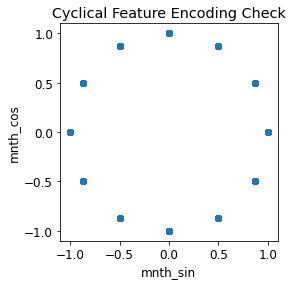

In [108]:
# check if circular features worked
plt.scatter(x=bikesharing['mnth_sin'].values, y=bikesharing['mnth_cos'].values)
plt.xlabel('mnth_sin')
plt.ylabel('mnth_cos')
plt.title('Cyclical Feature Encoding Check')
plt.rcParams.update({'font.size': 14})
plt.axis('square')
plt.show


In [109]:
# split dataset (roughly 72%-20%-8% split)

bikesharing_train, bikesharing_test = train_test_split(bikesharing, train_size=0.8)

bikesharing_train, bikesharing_validation = train_test_split(bikesharing_train, train_size=0.9)

In [110]:
# Feature scaling
# standardization only when data follows Gaussian distribution otherwise normalisation, but do we need them?
# yes, we need to scale our features, so we can compare them
# https://towardsdatascience.com/one-hot-encoding-standardization-pca-data-preparation-steps-for-segmentation-in-python-24d07671cf0b
# also cyclic features: https://themodelmill.com/modeling-of-cyclical-seasonal-data/

# e.g. helps to speed up regression; especially important when using algorithms which use euclidian distance; 
#      also good for classification
#      if all positive maybe log?

# 1. apply standard scaler from sklearn
def normalize_bikesharing_data(data): 
    scaler = StandardScaler()
    scaler.fit(data.loc[:, ~data.columns.\
        isin(['instant', 'dteday', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'])])
    scaled = scaler.transform(data.loc[:, ~data.columns.\
        isin(['instant', 'dteday', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'])])
    scaled_df = pd.DataFrame(scaled, columns=data.loc[:, ~data.columns.\
        isin(['instant', 'dteday', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'])].columns)

    print(scaled_df.mean()) # fine all around 0
    print(scaled_df.var()) # fine all around 1

    data_normalized = pd.concat([data[['instant', 'dteday']].reset_index(), scaled_df.reset_index(), \
        data[['weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']].reset_index()], axis=1)

    return(data_normalized)

bikesharing_train_normalized = normalize_bikesharing_data(bikesharing_train)
bikesharing_test_normalized = normalize_bikesharing_data(bikesharing_test)
bikesharing_validation_normalized = normalize_bikesharing_data(bikesharing_validation)


season_sin     3.407334e-18
season_cos    -3.293756e-17
yr            -5.338157e-17
mnth_sin      -5.622101e-17
mnth_cos       2.498712e-17
hr_sin        -2.044400e-17
hr_cos         1.249356e-17
holiday        1.476511e-17
weekday_sin    1.874034e-17
weekday_cos    3.520912e-17
workingday    -8.915858e-17
temp           6.928246e-17
atemp          7.098613e-18
hum            3.356224e-16
windspeed     -3.350545e-17
casual         2.157978e-17
registered    -1.135778e-18
cnt           -2.953023e-17
dtype: float64
season_sin     1.00008
season_cos     1.00008
yr             1.00008
mnth_sin       1.00008
mnth_cos       1.00008
hr_sin         1.00008
hr_cos         1.00008
holiday        1.00008
weekday_sin    1.00008
weekday_cos    1.00008
workingday     1.00008
temp           1.00008
atemp          1.00008
hum            1.00008
windspeed      1.00008
casual         1.00008
registered     1.00008
cnt            1.00008
dtype: float64
season_sin     6.643452e-18
season_cos    -4.394899e

<function matplotlib.pyplot.show(close=None, block=None)>

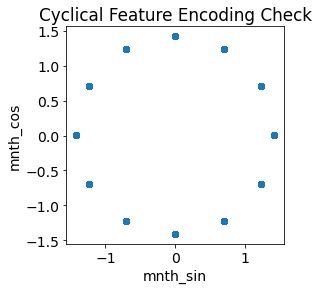

In [111]:
# check if values are still circular
plt.scatter(x=bikesharing_train_normalized['mnth_sin'].values, y=bikesharing_train_normalized['mnth_cos'].values)
plt.xlabel('mnth_sin')
plt.ylabel('mnth_cos')
plt.title('Cyclical Feature Encoding Check')
plt.rcParams.update({'font.size': 14})
plt.axis('square')
plt.show


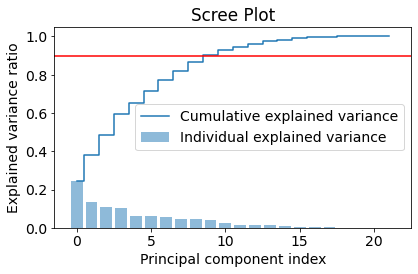

[0.24424976 0.38138742 0.48757398 0.59327824 0.65449445 0.71555694
 0.7704031  0.81807217 0.86405965 0.90240707 0.9291281  0.9459757
 0.96061407 0.97432317 0.98348208 0.9897736  0.99485127 0.999392
 0.99998275 1.         1.         1.        ]
[2.44249763e-01 1.37137662e-01 1.06186552e-01 1.05704264e-01
 6.12162098e-02 6.10624913e-02 5.48461563e-02 4.76690744e-02
 4.59874753e-02 3.83474187e-02 2.67210357e-02 1.68475953e-02
 1.46383719e-02 1.37090972e-02 9.15891743e-03 6.29151397e-03
 5.07767306e-03 4.54072479e-03 5.90757143e-04 1.72469203e-05
 2.82499118e-33 1.79007751e-33]


In [131]:
# PCA
# source: https://vitalflux.com/pca-explained-variance-concept-python-example/

# 1. Analyse explained variance ratio to find out how many principal components

# sidenote: no need to drop correlated variables as pca just puts them in the same eigenvector

pca = PCA()
bikesharing_train_normalized_pca = pca.fit_transform(bikesharing_train_normalized.loc[:, ~bikesharing_train_normalized.columns.\
    isin(['instant', 'dteday', 'index'])])
exp_var_bikesharing_train_normalized_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_bikesharing_train_normalized_pca)

plt.bar(range(0,len(exp_var_bikesharing_train_normalized_pca)), exp_var_bikesharing_train_normalized_pca, \
    alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.rcParams.update({'font.size': 13})
plt.tight_layout()
plt.show()

print(cum_sum_eigenvalues)
print(exp_var_bikesharing_train_normalized_pca)

In [135]:
# PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(bikesharing_train_normalized.loc[:, ~bikesharing_train_normalized.columns.\
    isin(['instant', 'dteday'])])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3',\
    'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8',\
    'principal component 9', 'principal component 10'])

principalDf


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,8455.006383,-6214.457224,1.383018,-1.192970,-0.519201,0.819192,-1.250188,1.703655,-0.396140,0.861936
1,9471.808785,-6208.512463,-2.045853,-0.662272,2.099617,0.534550,-0.071634,0.183007,1.323743,-0.760742
2,5363.561954,-6227.490902,-0.752664,-1.891472,-0.235323,-2.295773,-1.170153,0.411667,0.302233,0.979947
3,-3828.722029,-6271.193067,3.944309,0.965981,2.240750,1.686679,-0.840798,-0.615282,-0.319943,0.050230
4,11663.799247,-6194.852767,-2.421547,0.442870,-1.389692,0.908027,0.150228,0.987106,1.007978,0.145041
...,...,...,...,...,...,...,...,...,...,...
12507,-2479.574327,6239.515741,-1.003368,-0.643736,2.213714,2.023730,-1.200102,1.221941,-0.031340,0.369198
12508,10071.418215,6301.551271,2.443779,2.426636,-0.900261,2.368549,-1.206271,0.764976,-1.866901,0.489965
12509,-3760.846321,6235.284921,2.340840,-1.043854,-1.091603,1.531176,0.285676,-0.189146,1.517995,0.067023
12510,-277.684685,6253.223624,-2.494161,0.970300,2.528455,0.337385,4.487710,0.777596,0.921148,3.160020


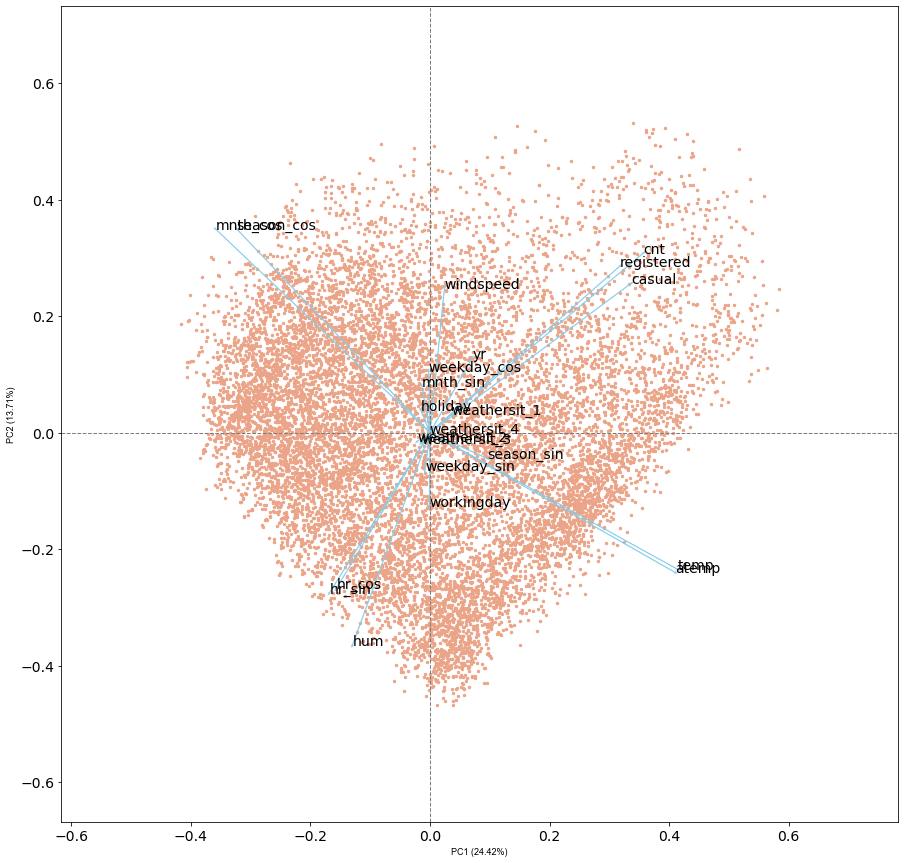

In [115]:
# Biplot of PCA
# https://www.reneshbedre.com/blog/principal-component-analysis.html


pca_out = PCA().fit(bikesharing_train_normalized.loc[:, ~bikesharing_train_normalized.columns.\
    isin(['instant', 'dteday', 'index'])])
loadings = pca_out.components_ #pca.components_ = eigen vectors. Take a transpose so that pc's are columns and variables are rows.
# -> so loadings are my directions

df = bikesharing_train_normalized.loc[:, ~bikesharing_train_normalized.columns.\
    isin(['instant', 'dteday', 'index'])]

#df = df.drop(columns=['index', 'index'])

pca_scores = PCA().fit_transform(bikesharing_train_normalized.loc[:, ~bikesharing_train_normalized.columns.\
    isin(['instant', 'dteday', 'index'])])

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), show = True, dim = (15,15))


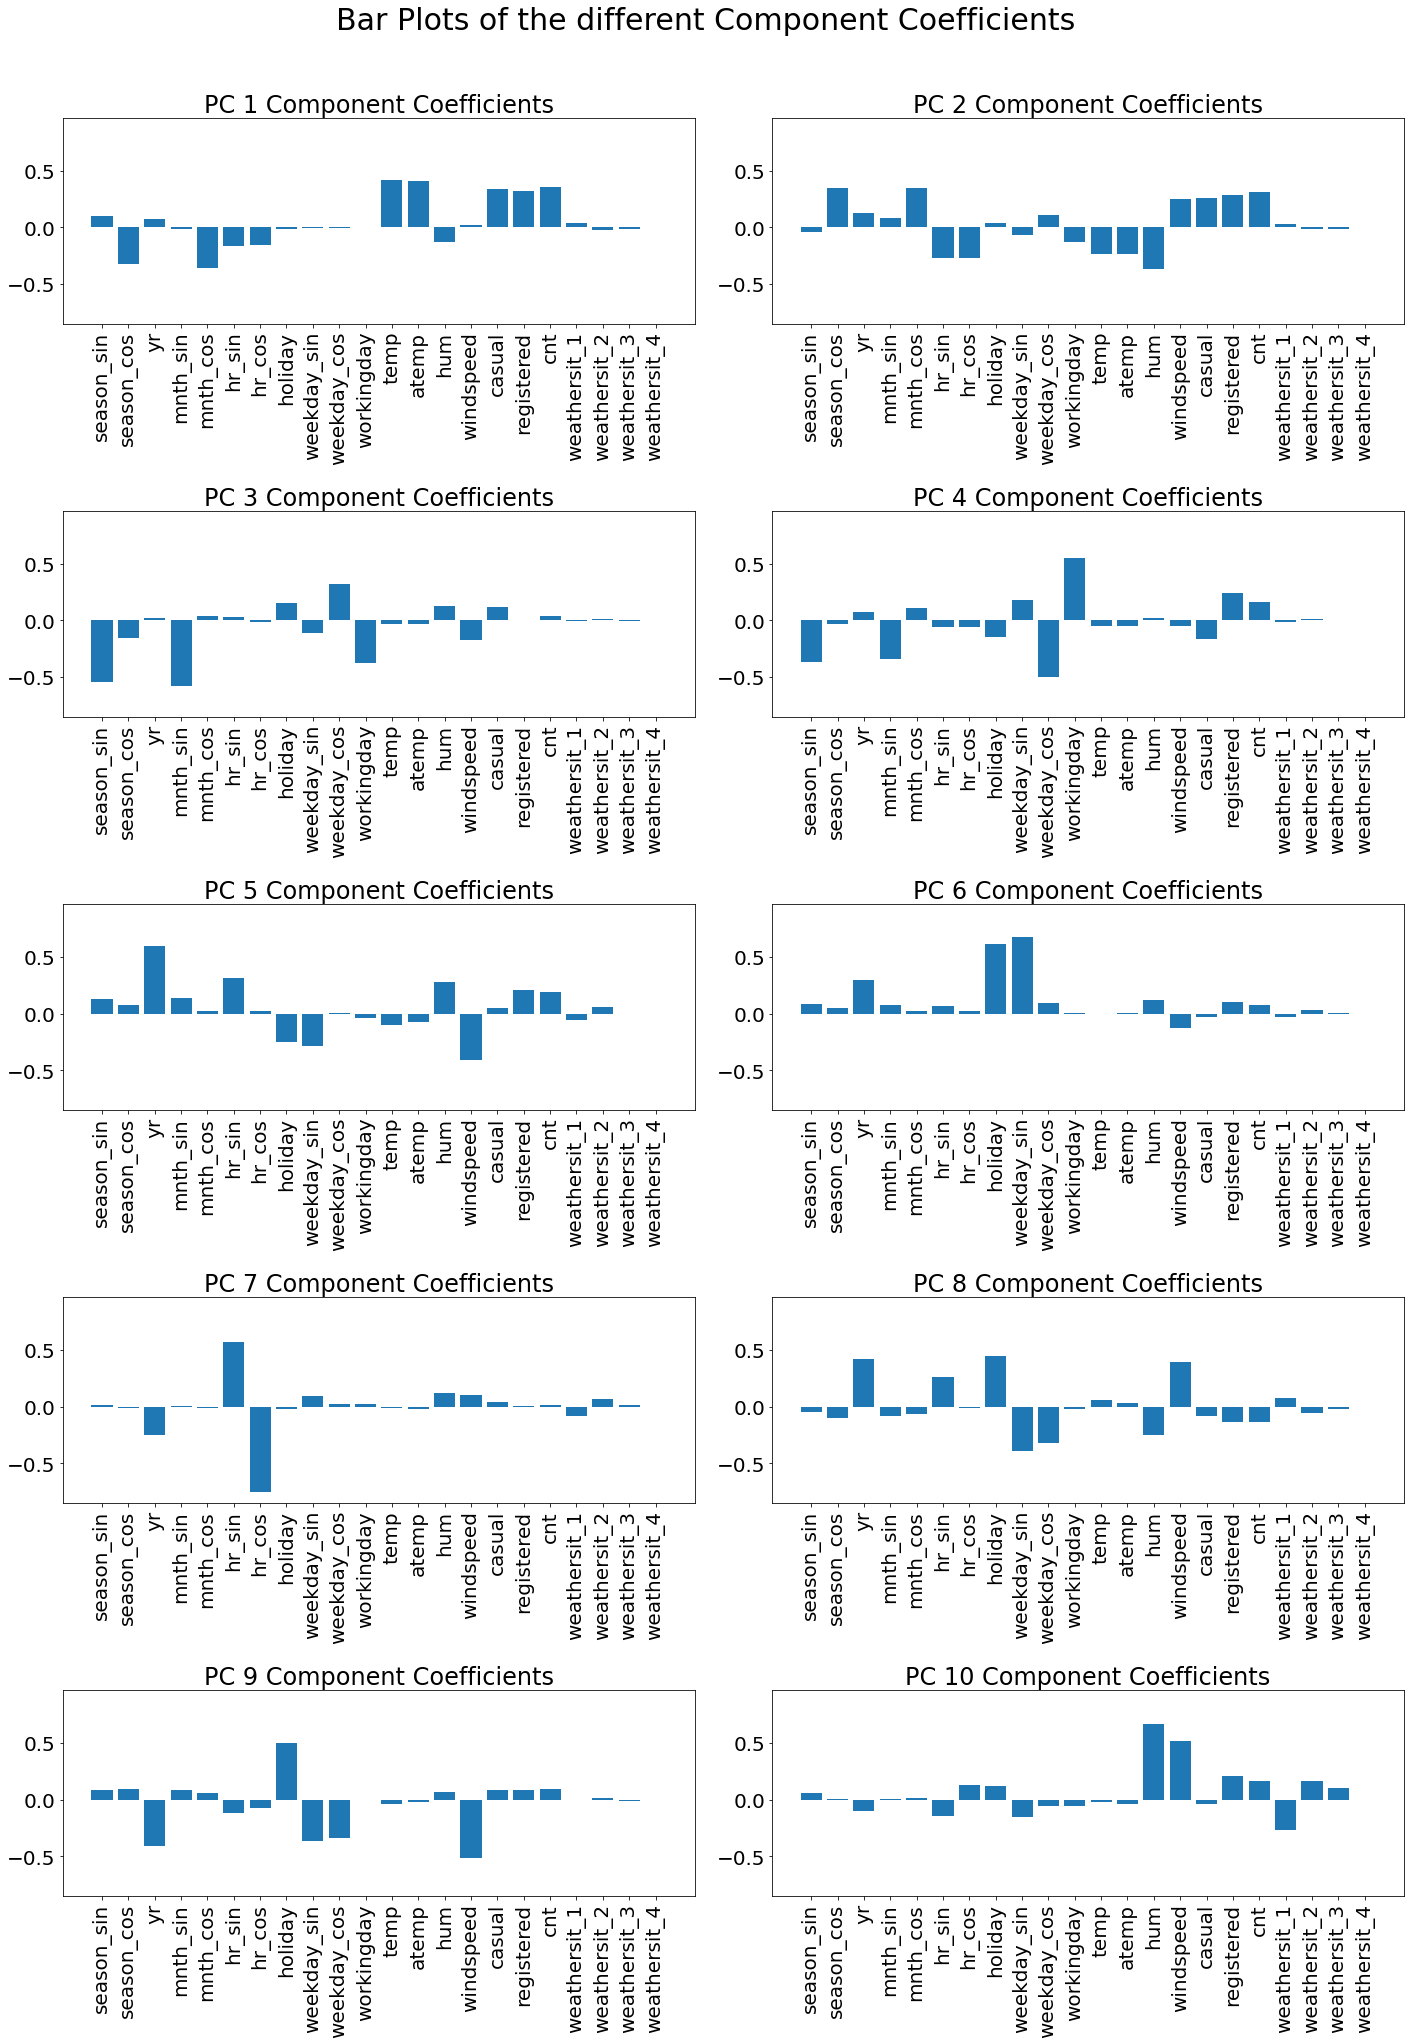

In [129]:
# bar plots of contribution of features to principal components
# -> plot the loadings
ymin = loadings.min() - 0.1
ymax = loadings.max() + 0.1

fig = plt.figure(figsize=(20, 30))
plt.rcParams.update({'font.size': 20})

for i in range(10):

    ax = fig.add_subplot(5, 2,i+1)
    ax.bar(x = df.columns.values, height = loadings[i])
    ax.set_title(f'PC {i+1} Component Coefficients')
    plt.ylim([ymin, ymax])
    plt.xticks(rotation=90) 

    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Bar Plots of the different Component Coefficients', fontsize = 30)
plt.show()